In [1]:
##import necessary packages
import cv2 #openCV
import random
import numpy as np
import os
#Creating two empty lists
#xs stores the image path
#ys stores the corresponding steering wheel angle in radians
xs = []
ys = []

In [2]:
from itertools import islice
from scipy import pi

with open(R"D:\Self driving cars\Autopilot-TensorFlow-master\Autopilot-TensorFlow-master\driving_dataset\data.txt") as f:
    for line in islice(f,None): #islice is used to iterate over every line
        a=line.split(',')[0]
        path,angle=a.strip().split() #split() splits the path and angle
        full_path=os.path.join(R"D:\Self driving cars\07012018",path)
        xs.append(full_path)
        ys.append(float(angle)*pi/180) #degree is converted to radian by multiplying pi/180

In [3]:
num_images = len(xs)
num_images

63825

In [4]:
#Random Shuffling
c = list(zip(xs,ys))
random.shuffle(c)
xs, ys = zip(*c)

In [5]:
#We take 80% of the data for training and 20% for testing
#This is temporal data so random split is not possible
split_index=int(0.8*len(xs))
train_xs = xs[:split_index]
train_ys = ys[:split_index]

val_xs = xs[split_index:]
val_ys = ys[split_index:]

In [6]:
num_train_images = len(train_xs)
num_val_images = len(val_xs)

In [7]:
print(num_train_images)
print(num_val_images)

51060
12765


In [8]:
train_batch_pointer = 0
val_batch_pointer = 0

def LoadTrainBatch(batch_size):
    global train_batch_pointer #To update the values for each batch, it is assigned with keyword global
    x_out = [] #train images are read,resized to (200,66) and normalised and appended in x_out
    y_out = [] #Corresponding steering wheel angles are appended
    for i in range(0, batch_size):
        x_out.append(cv2.resize(cv2.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], (200, 66)) / 255.0)
        y_out.append([train_ys[(train_batch_pointer + i) % num_train_images]])
    train_batch_pointer += batch_size
    return x_out, y_out

def LoadValBatch(batch_size):
    global val_batch_pointer
    x_out = []#validation images are read,resized to (200,66) and normalised and appended in x_out
    y_out = []#Corresponding steering wheel angles are appended
    for i in range(0, batch_size):
        x_out.append(cv2.resize(cv2.imread(val_xs[(val_batch_pointer + i) % num_val_images])[-150:], (200, 66)) / 255.0)
        y_out.append([val_ys[(val_batch_pointer + i) % num_val_images]])
    val_batch_pointer += batch_size
    return x_out, y_out


(array([2.1000e+01, 1.2000e+01, 9.4000e+01, 3.9000e+02, 1.7030e+03,
        5.4365e+04, 6.5780e+03, 4.1600e+02, 1.1900e+02, 1.2700e+02]),
 array([-5.91352469, -4.8812846 , -3.84904451, -2.81680441, -1.78456432,
        -0.75232423,  0.27991587,  1.31215596,  2.34439605,  3.37663615,
         4.40887624]),
 <BarContainer object of 10 artists>)

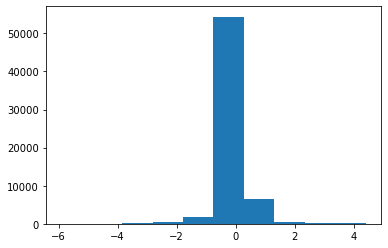

In [10]:
import matplotlib.pyplot as plt
plt.hist(ys)
